In [1]:
import pandas as pd

df = pd.read_csv("infection_root_barcodes.csv")

print(df.head())

   human_id  t  SNP_0  SNP_1  SNP_2  SNP_3  SNP_4  SNP_5  SNP_6  SNP_7  ...  \
0      7886  0      0      0      0      0      0      0      0      0  ...   
1      5064  0      1      1      1      1      1      1      1      1  ...   
2      2314  0      2      2      2      2      2      2      2      2  ...   
3      3715  0      3      3      3      3      3      3      3      3  ...   
4      9050  0      4      4      4      4      4      4      4      4  ...   

   SNP_14  SNP_15  SNP_16  SNP_17  SNP_18  SNP_19  SNP_20  SNP_21  SNP_22  \
0       0       0       0       0       0       0       0       0       0   
1       1       1       1       1       1       1       1       1       1   
2       2       2       2       2       2       2       2       2       2   
3       3       3       3       3       3       3       3       3       3   
4       4       4       4       4       4       4       4       4       4   

   SNP_23  
0       0  
1       1  
2       2  
3       3  
4 

In [2]:
import numpy as np

In [3]:
df_t = df[df["t"] == 1490]

In [4]:
df_t.shape

(12159, 26)

In [5]:
all_genomes = df_t[[f"SNP_{i}" for i in range(24)]].values

In [6]:
all_genomes.ravel()

array([3116, 2419, 3116, ..., 2374, 2374, 2374], dtype=int64)

In [7]:
roots, counts = np.unique(all_genomes.ravel(), return_counts=True)

root_count_df = pd.DataFrame({"root": roots, "count": counts})

In [8]:
# Fill in the missing roots
root_count_df = pd.merge(root_count_df, pd.DataFrame({"root": np.arange(4000)}), on="root", how="right").fillna(0)

<BarContainer object of 267 artists>

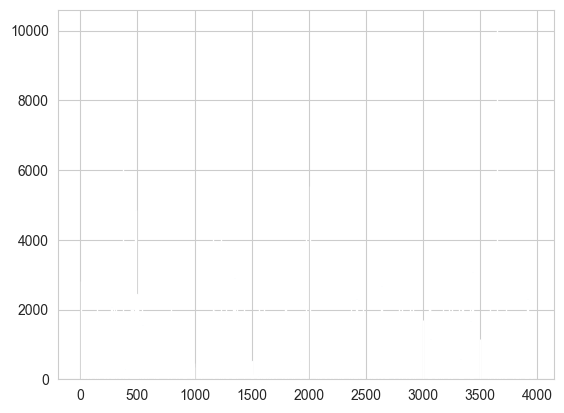

In [9]:
from matplotlib import pyplot as plt

plt.bar(roots, counts)

(array([3.779e+03, 2.200e+01, 1.700e+01, 1.400e+01, 1.900e+01, 2.000e+01,
        1.100e+01, 7.000e+00, 6.000e+00, 6.000e+00, 9.000e+00, 5.000e+00,
        5.000e+00, 3.000e+00, 3.000e+00, 9.000e+00, 7.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

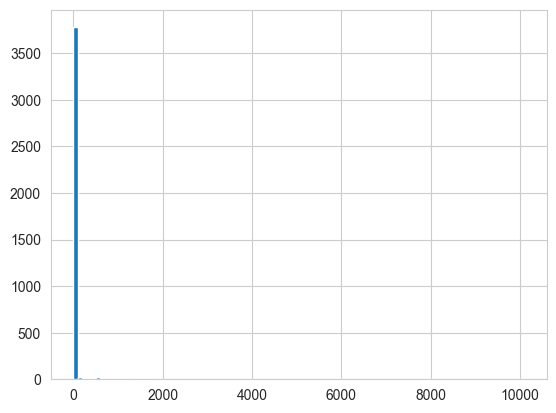

In [10]:
plt.hist(root_count_df["count"], bins=100)

In [11]:
np.median(root_count_df["count"])

0.0

In [12]:
np.sum(root_count_df["count"]>0)

267

(array([118.,  50.,  25.,  25.,  14.,  14.,  13.,   1.,   0.,   1.,   4.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 5.0570e+02, 1.0104e+03, 1.5151e+03, 2.0198e+03,
        2.5245e+03, 3.0292e+03, 3.5339e+03, 4.0386e+03, 4.5433e+03,
        5.0480e+03, 5.5527e+03, 6.0574e+03, 6.5621e+03, 7.0668e+03,
        7.5715e+03, 8.0762e+03, 8.5809e+03, 9.0856e+03, 9.5903e+03,
        1.0095e+04]),
 <BarContainer object of 20 artists>)

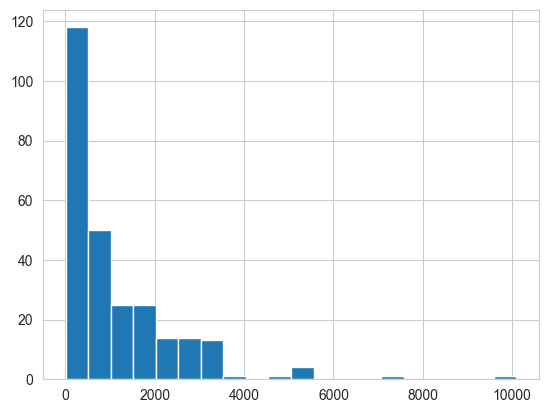

In [13]:
plt.hist(root_count_df["count"][root_count_df["count"]>0], bins=20)

In [14]:
np.sum(root_count_df["count"])

291816.0

In [15]:
407472/24

16978.0

In [16]:
np.max(root_count_df["count"])/np.sum(root_count_df["count"])

0.03459371658853524

In [17]:
np.min(root_count_df["count"][root_count_df["count"]>0])

1.0

In [18]:
root_count_df[root_count_df["count"]==1]

,root,count
2343,2343,1.0


In [19]:
df

,human_id,t,SNP_0,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,...,SNP_14,SNP_15,SNP_16,SNP_17,SNP_18,SNP_19,SNP_20,SNP_21,SNP_22,SNP_23
0,7886,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5064,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2314,0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3715,0,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,9050,0,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713694,6752,1490,2010,2010,2010,2010,2010,2010,2010,2010,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
1713695,6024,1490,1336,1336,1336,1336,1336,1336,1336,1336,...,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336
1713696,5142,1490,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
1713697,9051,1490,1789,1789,1789,1789,1789,1789,1789,1789,...,1789,1789,1789,1789,1789,1789,1789,1789,1789,1789


In [20]:
np.sum(root_count_df["count"]>1)/4000

0.0665